## EDA - Retail Sales


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
PROCESSED_PATH = Path('../data/processed')

In [23]:
df = pd.read_csv(
    PROCESSED_PATH / 'retail_sales.csv'
)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Ventas totales por categoría

In [4]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [5]:
categories_revenue = df.groupby(['Product Category'])['Total Amount'].sum().to_frame()
categories_revenue

,Total Amount
Product Category,
Beauty,142015
Clothing,155580
Electronics,156875


In [6]:
categories_revenue.index

Index(['Beauty', 'Clothing', 'Electronics'], dtype='object', name='Product Category')

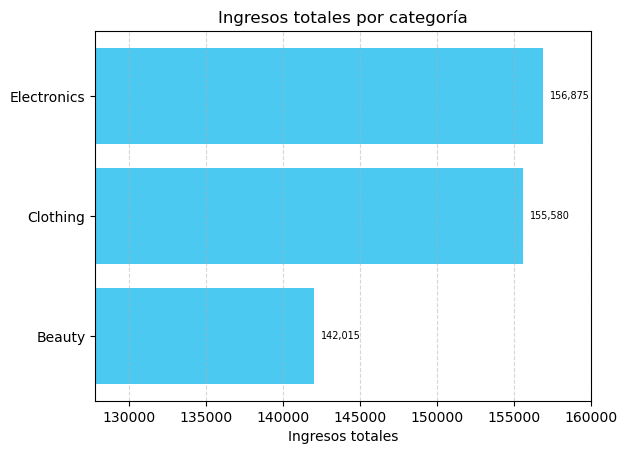

In [58]:
y_pos = np.arange(len(categories_revenue.index))
left_lim = categories_revenue['Total Amount'].min() * 0.9
right_lim = 160000
fig, ax = plt.subplots()
barh = ax.barh(
    y_pos,
    categories_revenue['Total Amount'],
    color = '#4CC9F0',
    align = 'center'
)
ax.set_yticks(y_pos, labels = categories_revenue.index)
ax.set_xlim(left = left_lim, right = right_lim)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.bar_label(barh, fmt='{:,.0f}', padding=5, fontsize=7)
ax.set_xlabel('Ingresos totales')
ax.set_title('Ingresos totales por categoría')
plt.show()

### Ventas por mes

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Month'] = df['Date'].dt.month
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [46]:
month_revenue = df.groupby(['Month'])['Total Amount'].sum().to_frame()
month_revenue

,Total Amount
Month,
1,35450
2,44060
3,28990
4,33870
5,53150
6,36715
7,35465
8,36960
9,23620


In [47]:
month_revenue['Total Amount']

Month
1     35450
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

In [59]:
months = [
    'Enero',
    'Febrero',
    'Marzo',
    'Abril',
    'Mayo', 
    'Junio',
    'Julio',
    'Agosto',
    'Septiembre', 
    'Octubre',
    'Noviembre',
    'Diciembre'
]

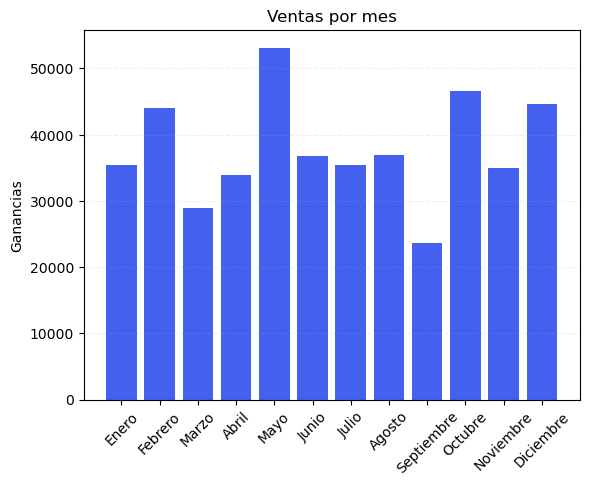

In [ ]:
fig, ax = plt.subplots()
ax.bar(
    x = months,
    height = month_revenue['Total Amount'],
    color = '#4361EE'
)
ax.set_title('Ventas por mes')
ax.set_ylabel('Ganancias')
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax
plt.xticks(rotation = 45)
plt.show()

### Ticket medio por categoría

In [ ]:
beauty = df[df['Product Category'] == 'Beauty'] 
beauty['Total Amount'].mean()


np.float64(464.10130718954247)

In [74]:
clothing = df[df['Product Category'] == 'Clothing'] 
clothing['Total Amount'].mean()

np.float64(443.2478632478632)

In [75]:
electronics = df[df['Product Category'] == 'Electronics'] 
electronics['Total Amount'].mean()

np.float64(460.04398826979474)

In [92]:
categoria_mean = pd.DataFrame({
    'Categoria' : df['Product Category'].unique(),
    'Mean' : [round(beauty['Total Amount'].mean(),2),
              round(clothing['Total Amount'].mean(),2),
              round(electronics['Total Amount'].mean(),2)]

})
categoria_mean = categoria_mean.sort_values(by = 'Mean', ascending=False)

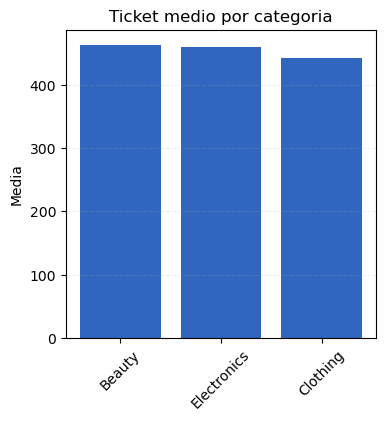

In [93]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = categoria_mean['Categoria'],
    height = categoria_mean['Mean'],
    color = '#3066BE'
)
ax.set_title('Ticket medio por categoria')
ax.set_ylabel('Media')
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax
plt.xticks(rotation = 45)
plt.show()

### Ventas por género

In [96]:
gender_revenue = df.groupby(['Gender'])['Total Amount'].sum().to_frame()
gender_revenue

,Total Amount
Gender,
Female,232840
Male,221630


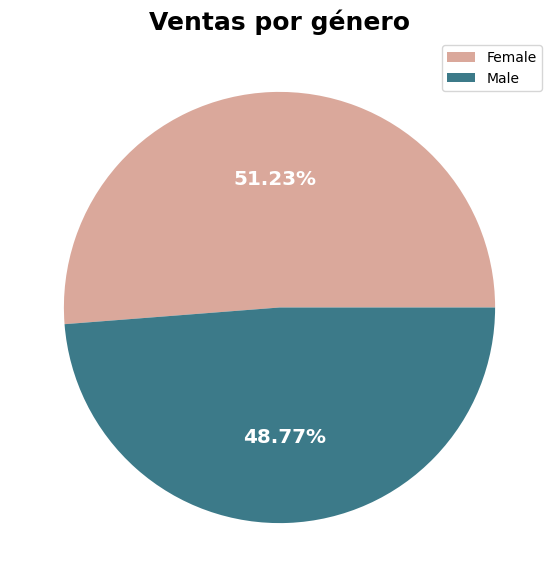

In [114]:
plt.figure(figsize = (9,7))
plt.pie(
    gender_revenue['Total Amount'],
    labels = gender_revenue.index,
    colors = ['#DAA89B', '#3C7A89'],
    autopct = '%.2f%%',
    textprops = {
        'size' : 'x-large',
        'fontweight' : 'bold',
        'color' : 'w'
    }
)
plt.legend()
plt.title('Ventas por género', fontsize = 18, fontweight = 'bold')
plt.show()

### Distribución de edad de clientes

In [111]:
customer_age_dist = df[['Age', 'Total Amount']]
customer_age_dist.head()

,Age,Total Amount
0,34,150
1,26,1000
2,50,30
3,37,500
4,30,100


In [117]:
bins = np.arange(df['Age'].min(), df['Age'].max() + 5.75, 5.75)
labels = [f"[{bins[i]}, {bins[i+1]})" for i in range(len(bins)-1)]
centers = (bins[:-1] + bins[1:]) / 2
centers

array([20.875, 26.625, 32.375, 38.125, 43.875, 49.625, 55.375, 61.125])

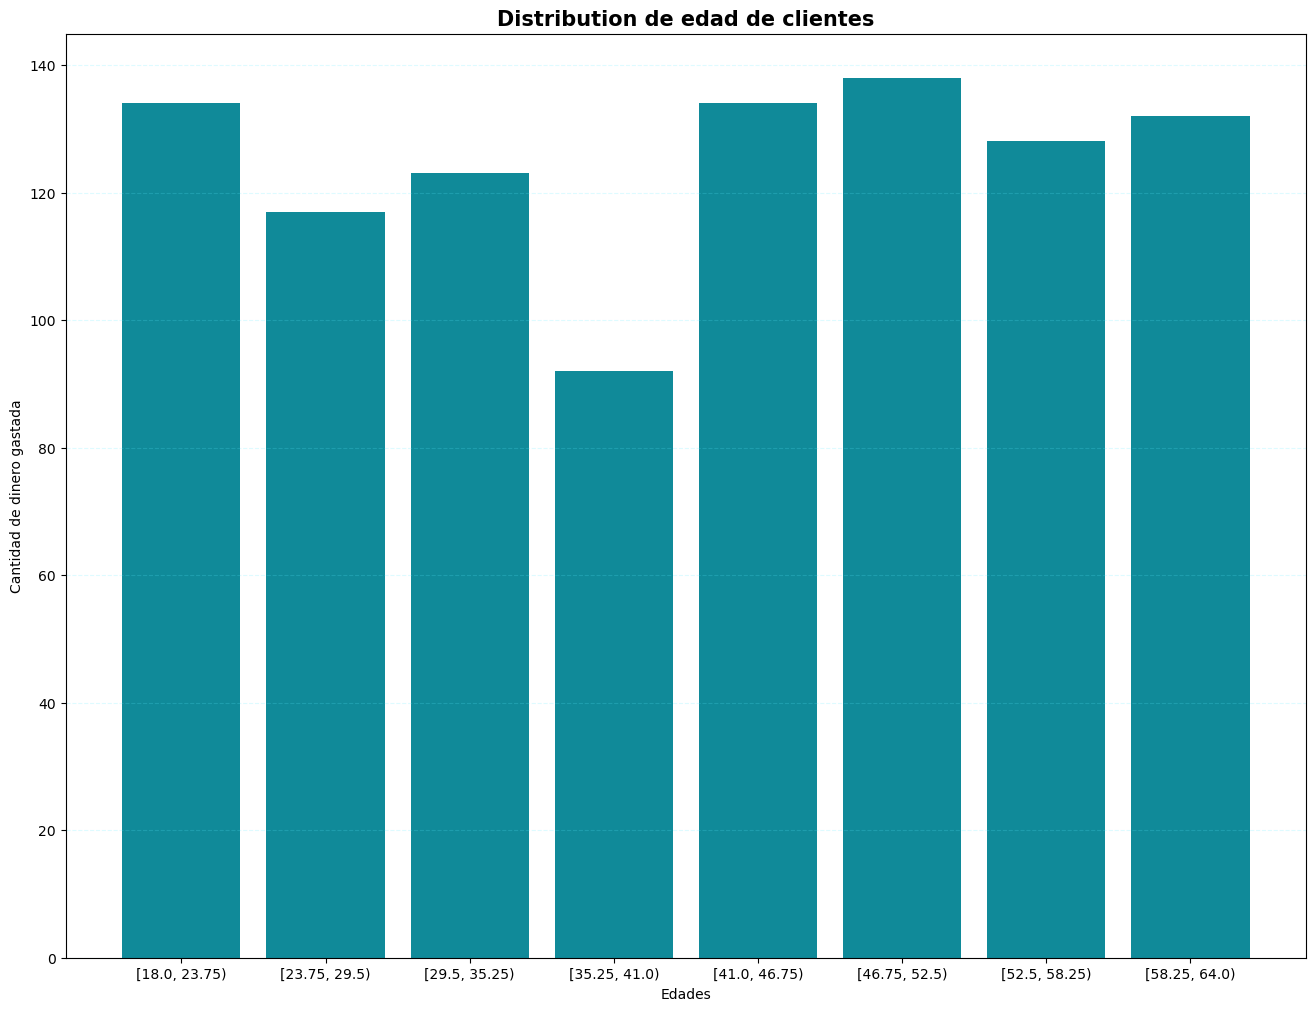

In [140]:
plt.figure(figsize = (16,12))
hist = plt.hist(
    customer_age_dist['Age'],
    bins = 8,
    color = '#108A99',
    rwidth = 0.82
)
plt.title('Distribution de edad de clientes', fontsize = 15, fontweight = 'bold')
plt.xticks(centers, labels)
plt.xlabel('Edades')
plt.ylabel('Cantidad de dinero gastada')
plt.grid(color = "#5BECFF", linestyle = '--', axis = 'y', alpha = 0.2)
plt.show()